# Part II - (Prosper Loan Analysis)
## by (Akua Amankwa Otchere)

## Investigation Overview

The main objective of the presentation is to determine features that influences the Loan Amount, and features that will have relationship with applicants loan status. How are these features correlated with each other. 


## Dataset Overview

This dataset is financial dataset and this is related to the loan, borrowers, lenders, interest rates and stuffs like that. Prosper or Prosper Marketplace Inc. is a San Francisco, California based company specializing in loans at low interest rates to the borrowers.

This data set contains 113,937 loan records with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.
Since Prosper was founded in 2005, the data set includes information for the first nine years of the company, from 2005 to 2014. It has 113,937 observations over 81 different variables.

This [data dictionary](https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0) explains the variables in the data set.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
data = pd.read_csv('prosperLoanData.csv')

## Loan Status of Applicants 

 About 33% of the applicants have a Completed loan status with very few of them defaulted. A whoping 62% has either a past due loan staus or any other form aside completed or default.


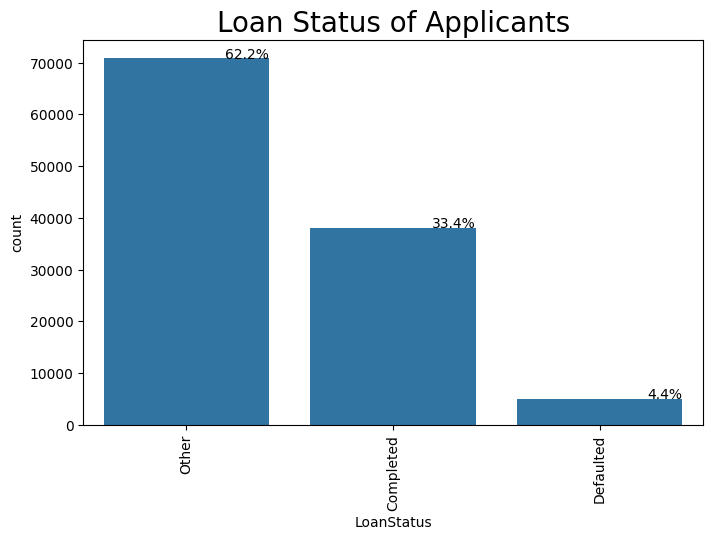

In [3]:
#looking at the frequencies of employment status of applicants 
import seaborn as sns

data["LoanStatus"]=data["LoanStatus"].replace({"Past Due (1-15 days)":"Other", "Past Due (31-60 days)":"Other", 
                     "Past Due (61-90 days)":"Other", "Past Due (91-120 days)":"Other",
                                        "Past Due (16-30 days)":"Other", "Past Due (>120 days)":"Other", 
                                            "Current":"Other", "Chargedoff":"Other", 
                                             "FinalPaymentInProgress":"Other", "Cancelled":"Other"})

total = len(data)
plt.figure(figsize=(8,5))
order=data['LoanStatus'].value_counts().index
ax = sns.countplot(x="LoanStatus", data=data, order=order, color = sns.color_palette()[0])
plt.title('Loan Status of Applicants', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
    plt.xticks(rotation=90)

In [4]:

plt.show()

## Distribution of Loan Overtime (2005-2014)

Number of loans increased from 2005 to 2007, After 2008, the number of loans decreased, although it later resumed increasing exponentially. The line declines once more in 2014. This is due to the fact that the data did not cover the entire year.

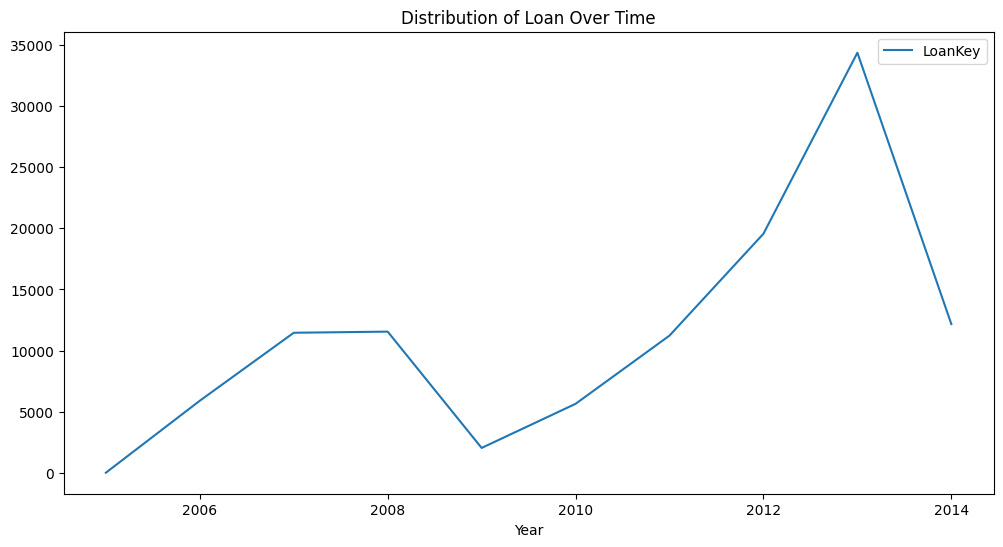

In [5]:
#converting the date column to the correct data type 
data['LoanOriginationDate'] = pd.to_datetime(data['LoanOriginationDate'])
#extracting year from the date column
data['Year'] = data['LoanOriginationDate'].dt.year

#looking at the trend of loans granted over the years 
data.groupby('Year')[['LoanKey']].count().plot(figsize=[12,6]).set_title('Distribution of Loan Over Time');

## Loan Term vs Loan Original Amount
Loan term and loan amount have a positive relationship. Applicants with 36 months (5 years) term tends to receive a higher loan amount than the other applicants. The 75th percentile of loan amounts for loans of one year is really much lower than the 25th percentile for loans of five years. This may indicate that Prosper's 1-year loans are frequently used for less expensive, impulsive purchases.


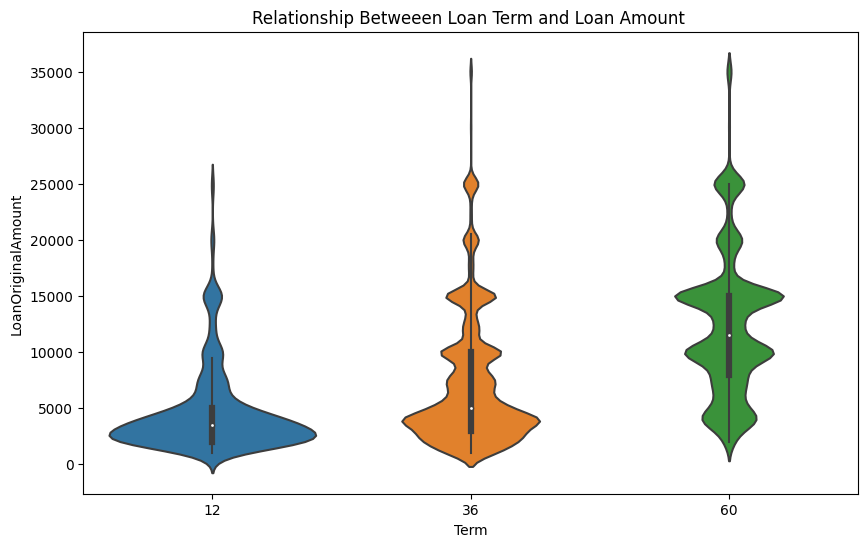

In [6]:
plt.figure(figsize=(10,6))
plt.title('Relationship Betweeen Loan Term and Loan Amount ')
sns.violinplot(data['Term'], data['LoanOriginalAmount']);

## Loan Term Vs Loan Status
Comparing the loan term of applicants, applicants with 1 year loan term tends to have most completed loan status. Other forms of loan terms is dominant for applicants with 3 or 5 years although applicant's with 1 year loan term are very few. Proportionally, 5 year term loan applicants tends to have the least completed loan status. They mosly have past due loan status or other forms of status either than complete or defaulted. 

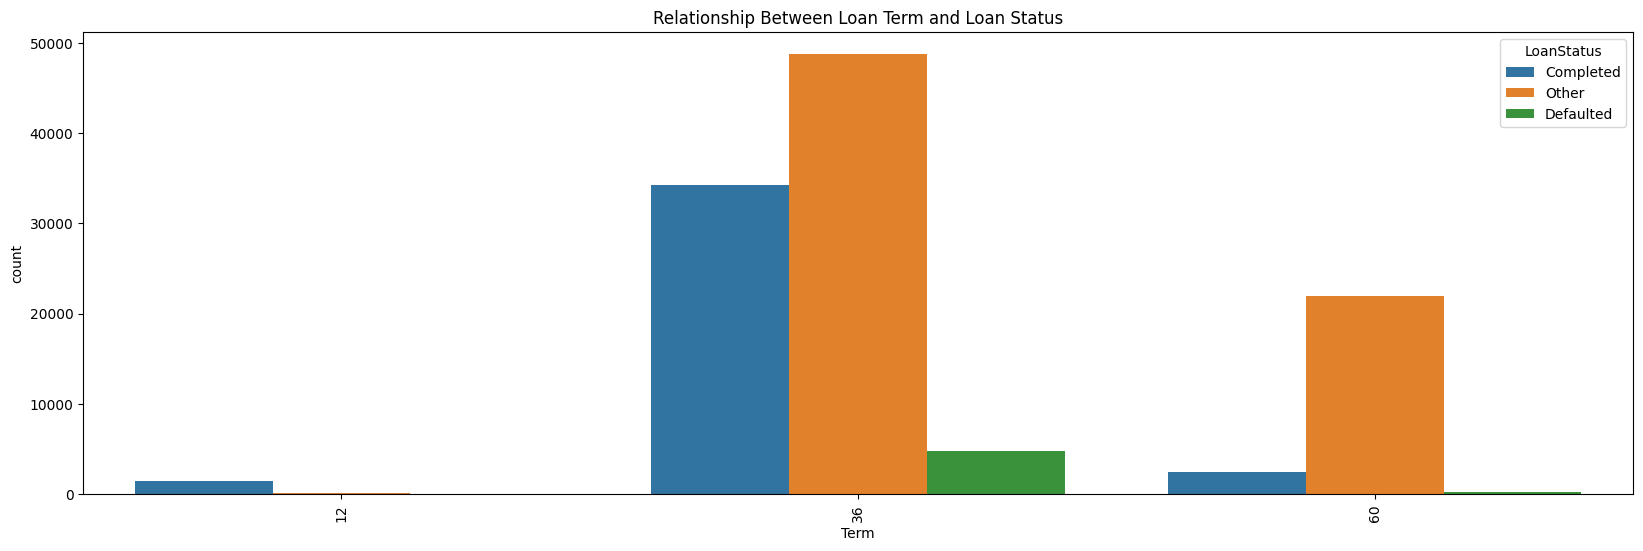

In [7]:
#relationship between Loan term and LoanStatus

plt.figure(figsize=[20,6])
plt.title('Relationship Between Loan Term and Loan Status')

sns.countplot(data = data, x = 'Term', hue = 'LoanStatus')
plt.xticks(rotation=90);